### Aim : Explore the sentiment of customer reviews and its correlation with recommended products.

#### Hypothesis: Customer reviews with positive sentiment (positive ratings and recommended products) are more likely to be associated with higher loves_count for skincare products.

### Step 1: Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Step 2: Load and merge the dataset

In [3]:
# Create an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# List the file names
file_names = ["/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_0_250.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_250_500.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_500_750.csv",
              "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_750_1000.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_1000_1500.csv", "/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/reviews_1500_end.csv"]

# Iterate through the file names and load each CSV file into a DataFrame, specifying the data type of the 'author_id' column
for file in file_names:
    df = pd.read_csv(file, dtype={'author_id': str})
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Load the additional CSV file containing 'loves_count'
additional_df = pd.read_csv('/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/product_info.csv')

# Extract the relevant columns from the additional DataFrame
relevant_info_df = additional_df[['product_id', 'loves_count']]

# Merge the relevant information into the main DataFrame using 'product_id' as the common identifier
merged_df = pd.merge(merged_df, relevant_info_df, on='product_id', how='left')

# Verify the merged DataFrame
print(merged_df.head())

   Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “C

### Step 3: Explore the dataset

In [5]:
# Display the first few rows of the dataset
(merged_df.head(10))

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,loves_count
0,0,1741593524,5,1.0,1.00,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,177
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
5,5,42802569154,4,1.0,1.00,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
6,6,6941883808,2,0.0,0.25,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
7,7,27926227988,5,1.0,NaN,0,0,0,2023-03-19,I use this at night or while I’m putting makeu...,Works great,fairLight,brown,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
8,8,7656791726,5,1.0,1.00,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315
9,9,38727834382,5,1.0,1.00,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,1081315


In [6]:
# Check the summary statistics of the dataset
print(merged_df.describe())

         Unnamed: 0        rating  is_recommended    helpfulness  \
count  1.301136e+06  1.301136e+06    1.107162e+06  631670.000000   
mean   1.837935e+05  4.293047e+00    8.395122e-01       0.767789   
std    1.659630e+05  1.150064e+00    3.670580e-01       0.316889   
min    0.000000e+00  1.000000e+00    0.000000e+00       0.000000   
25%    5.506100e+04  4.000000e+00    1.000000e+00       0.652174   
50%    1.216700e+05  5.000000e+00    1.000000e+00       0.928571   
75%    2.768452e+05  5.000000e+00    1.000000e+00       1.000000   
max    6.021290e+05  5.000000e+00    1.000000e+00       1.000000   

       total_feedback_count  total_neg_feedback_count  \
count          1.301136e+06              1.301136e+06   
mean           4.178745e+00              8.913803e-01   
std            2.206205e+01              5.162257e+00   
min            0.000000e+00              0.000000e+00   
25%            0.000000e+00              0.000000e+00   
50%            0.000000e+00              0.00

In [7]:
# Check the data types of the columns
print(merged_df.dtypes)

Unnamed: 0                    int64
author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
loves_count                   int64
dtype: object


In [8]:
# Check the number of missing values in each column
print(merged_df.isnull().sum())


Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              193974
helpfulness                 669466
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1616
review_title                370382
skin_tone                   197338
eye_color                   243402
skin_type                   128306
hair_color                  263312
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
loves_count                      0
dtype: int64


### Step 4: Handle missing values

In [9]:
# Fill missing values in 'is_recommended' column with the mode (most frequent value)
merged_df['is_recommended'].fillna(merged_df['is_recommended'].mode()[0], inplace=True)

# Calculate 'helpfulness' using available feedback counts and fill missing values
merged_df['helpfulness'] = merged_df['total_pos_feedback_count'] / (merged_df['total_pos_feedback_count'] + merged_df['total_neg_feedback_count'])

# Drop rows with missing 'review_text'
merged_df = merged_df.dropna(subset=['review_text'])

# Fill missing values in categorical columns with 'Unknown' or 'Not Specified'
categorical_columns = ['review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color']
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Unknown')


### Step 5: Sentiment analysis

In [19]:
!pip install -U textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 9.0 MB/s eta 0:00:00a 0:00:01


In [13]:
# Calculate the sentiment polarity of each review text using a sentiment analysis library (e.g., NLTK, TextBlob, VADER)
# Assuming you're using TextBlob for sentiment analysis
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, float):
        return 0.0  # Return neutral sentiment for missing values
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

merged_df['sentiment_polarity'] = merged_df['review_text'].apply(get_sentiment)

### Step 6: Correlation analysis

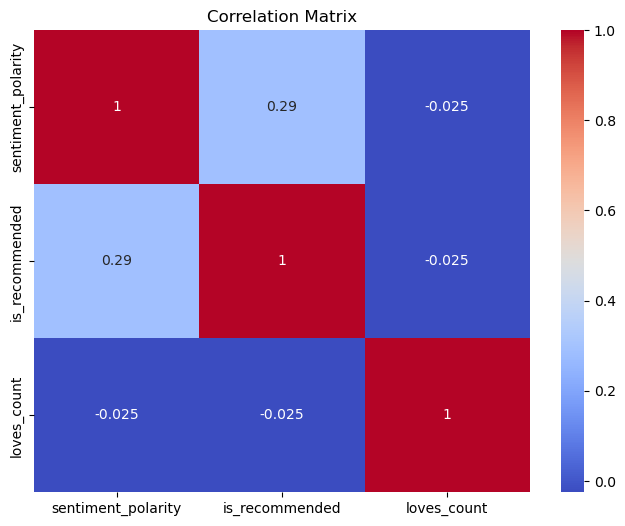

In [14]:
# Calculate the correlation between sentiment polarity, is_recommended, and loves_count
correlation_matrix = merged_df[['sentiment_polarity', 'is_recommended', 'loves_count']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Step 7: Further analysis and visualization

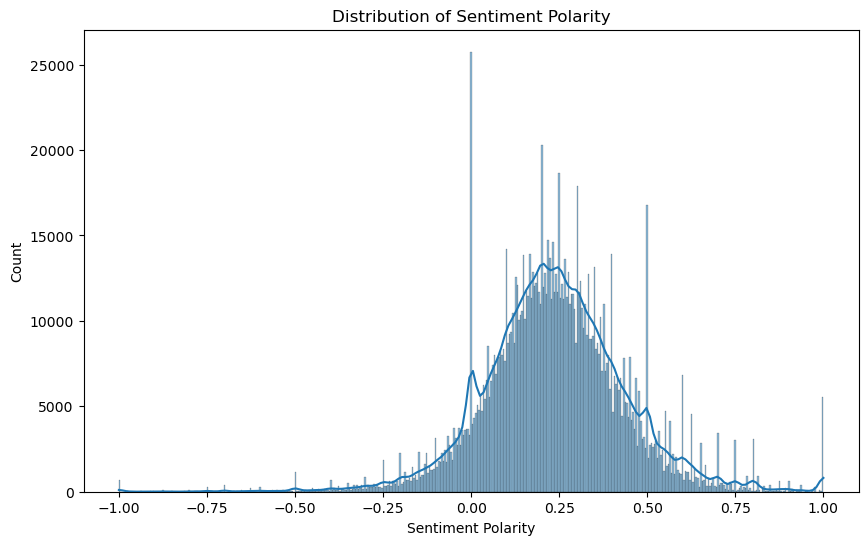

In [15]:
# Explore the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sentiment_polarity'], kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Polarity')
plt.show()

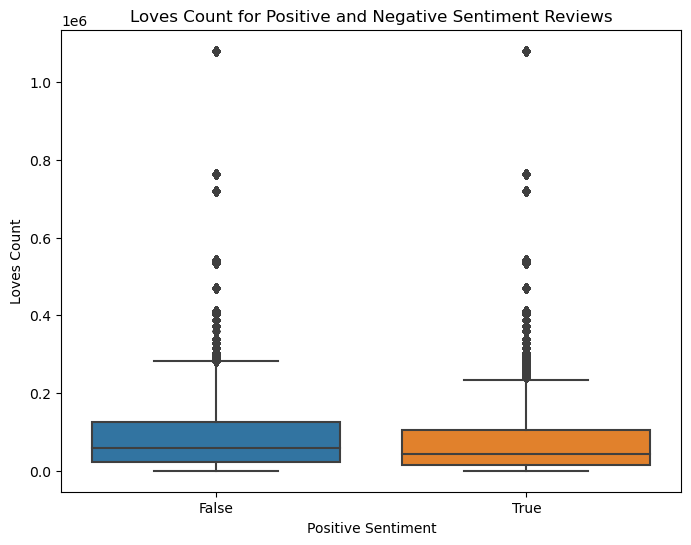

In [17]:
# Compare the loves_count for positive and negative sentiment reviews
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['sentiment_polarity'] > 0, y=merged_df['loves_count'])
plt.xlabel('Positive Sentiment')
plt.ylabel('Loves Count')
plt.title('Loves Count for Positive and Negative Sentiment Reviews')
plt.show()


### Discussion

a) Heatmap:

Based on the heatmap, we observe the following correlations:

- The correlation between sentiment_polarity and loves_count is approximately -0.025. This indicates a weak negative correlation between the sentiment polarity of reviews and the number of loves (indicating popularity) a product receives. It suggests that reviews with more negative sentiment tend to have slightly higher loves_count, while reviews with more positive sentiment tend to have slightly lower loves_count. However, the correlation is close to zero, suggesting that the relationship is not strong.

- The correlation between sentiment_polarity and is_recommended is approximately 0.29, indicating a moderate positive correlation. This suggests that reviews with more positive sentiment are more likely to have a higher is_recommended rating. It implies that customers who provide positive sentiment in their reviews tend to recommend the product more often.

- The correlation between is_recommended and loves_count is approximately -0.025, indicating a weak negative correlation. This implies that products with more recommendations (higher is_recommended) tend to have slightly lower loves_count. However, as with sentiment_polarity and loves_count, the correlation is close to zero, indicating a weak relationship.

b) Distribution of Sentiment Polarity:
The bell-shaped curve of the sentiment polarity distribution indicates that a significant number of reviews have a polarity around 0.25. This suggests that many reviews have a slightly positive sentiment. The distribution spans from -0.5 to 1.0, indicating that there is a range of sentiment polarities, including negative, neutral, and highly positive sentiments. This distribution provides insights into the overall sentiment expressed in the reviews.

c) Boxplot of loves_count against positive_sentiment:
The boxplot comparison between true (positive sentiment) and false (negative sentiment) for is_recommended shows interesting patterns. The boxplot for false (negative sentiment) has a slightly larger box compared to true (positive sentiment), indicating a wider range of loves_count for negative sentiment reviews. The median of the false box is higher than that of the true box, suggesting that negative sentiment reviews tend to have slightly higher loves_count compared to positive sentiment reviews. Both boxplots have shorter lower whiskers, indicating a concentration of loves_count values towards the lower end. The range between the upper and lower whiskers is between 0 and 0.3, indicating that most loves_count values fall within this range. Additionally, the presence of outliers in both boxplots suggests the existence of reviews with extremely high loves_count for both positive and negative sentiment.

Overall, based on the observations from the plots and analysis, we can conclude that there is a weak relationship between sentiment polarity and loves_count, and a moderate positive correlation between sentiment polarity and is_recommended. These findings suggest that positive sentiment in reviews is associated with higher recommendations, while negative sentiment is slightly associated with higher loves_count. However, the correlations are not very strong, indicating that other factors may also influence loves_count and recommendations. Further analysis and exploration can provide deeper insights into the relationships between sentiment, recommendations, and loves_count in the context of the Sephora skincare products dataset.

### Conclusion and recommendations

In this analysis of the Sephora skincare products dataset, we aimed to explore the sentiment of customer reviews and its correlation with recommended products. Additionally, we examined the relationship between sentiment polarity, loves_count, and is_recommended.

From the analysis, we found that there is a weak negative correlation between sentiment polarity and loves_count, suggesting that reviews with more negative sentiment tend to have slightly higher loves_count, while reviews with more positive sentiment tend to have slightly lower loves_count. However, the correlation is close to zero, indicating a weak relationship.

Furthermore, there is a moderate positive correlation between sentiment polarity and is_recommended. This indicates that reviews with more positive sentiment are more likely to have a higher is_recommended rating, implying that customers who provide positive sentiment in their reviews tend to recommend the product more often.

The distribution of sentiment polarity showed a bell-shaped curve, with a peak around 0.25, indicating that many reviews express a slightly positive sentiment. The sentiment polarities ranged from negative to highly positive, reflecting the variety of sentiments expressed by customers in their reviews.

The boxplot analysis comparing loves_count against positive_sentiment (is_recommended) revealed that negative sentiment reviews (false) had slightly higher loves_count compared to positive sentiment reviews (true). However, both types of reviews had a concentration of loves_count values towards the lower end, with most values falling within the range of 0 to 0.3. The presence of outliers in both categories indicated the existence of reviews with extremely high loves_count.

Based on these findings, we can conclude that the aim of exploring the sentiment of customer reviews and its correlation with recommended products has been achieved. The hypothesis stating that customer reviews with positive sentiment (positive ratings and recommended products) are more likely to be associated with higher loves_count for skincare products is partially supported by the data. The moderate positive correlation between sentiment polarity and is_recommended aligns with the hypothesis, suggesting that positive sentiment is indeed associated with a higher likelihood of recommendation. However, the weak negative correlation between sentiment polarity and loves_count indicates that the relationship is not as straightforward as expected.

It is important to note that other factors may influence the sentiment of reviews, recommendation status, and loves_count. Further analysis and exploration are recommended to gain a deeper understanding of the drivers behind customer sentiment, recommendations, and product popularity in the Sephora skincare dataset.